In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objs as go
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report

In [2]:
dataset = pd.read_csv(r"D:\CEREN\Dataset.csv")

In [3]:
X = dataset.copy()
y = X['DEATH_EVENT']
X = X.drop(['DEATH_EVENT'], axis=1)

X, X_test, y, y_test = train_test_split(X, y, random_state=0, test_size=0.2, shuffle=True)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on train set: 0.85
Accuracy of logistic regression classifier on test set: 0.75


D:\Programlar\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


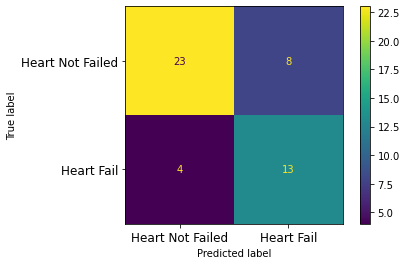

In [5]:
plot_confusion_matrix(logreg, X_test, y_test)
plt.xticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.yticks(range(2), ["Heart Not Failed","Heart Fail"], fontsize=12)
plt.show()

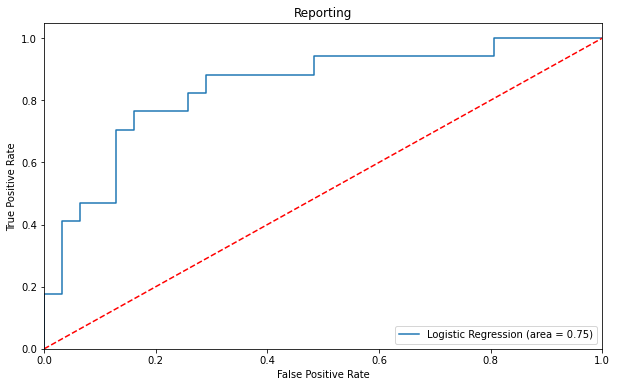

In [6]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure(figsize=(10,6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Reporting')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()